# Sales Data Exploration and Analysis

This notebook explores the sales dataset and provides insights for the dashboard development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Data Loading and Overview

In [2]:
# Load data from database
conn = sqlite3.connect('../data/sales_data.db')
df = pd.read_sql_query("SELECT * FROM sales_data", conn)
conn.close()

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
df.head()

Dataset shape: (2823, 15)

Column names: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'COUNTRY', 'PRODUCTLINE', 'CUSTOMERNAME', 'REVENUE_PER_UNIT', 'ORDER_SIZE']


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,COUNTRY,PRODUCTLINE,CUSTOMERNAME,REVENUE_PER_UNIT,ORDER_SIZE
0,10107,30,95.70,2,2871.00,2003-02-24 00:00:00,Shipped,1,2,2003,Usa,Motorcycles,Land Of Toys Inc.,95.70,229
1,10121,34,81.35,5,2765.90,2003-05-07 00:00:00,Shipped,2,5,2003,France,Motorcycles,Reims Collectables,81.35,185
2,10134,41,94.74,2,3884.34,2003-07-01 00:00:00,Shipped,3,7,2003,France,Motorcycles,Lyon Souveniers,94.74,227
3,10145,45,83.26,6,3746.70,2003-08-25 00:00:00,Shipped,3,8,2003,Usa,Motorcycles,Toys4Grownups.Com,83.26,563
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,Usa,Motorcycles,Corporate Gift Ideas Co.,106.23,585


In [ ]:
# With cancelled orders
print(f"\nTotal records: {len(df)}")
print("Status distribution:")
print(df['STATUS'].value_counts())


Total records: 2823
Status distribution:
STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64


In [ ]:
# Without cancelled orders
df_active = df[df['STATUS'] != 'Cancelled'].copy()
print(f"\nActive records: {len(df_active)}")
print(f"Cancelled records excluded: {len(df) - len(df_active)}")


After filtering - Active records: 2763
Cancelled records excluded: 60


In [3]:
# Basic statistics
print("Dataset Info:")
df.info()
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   object 
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  COUNTRY           2823 non-null   object 
 11  PRODUCTLINE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  REVENUE_PER_UNIT  2823 non-null   float64
 14  ORDER_SIZE        2823 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 330.9+ KB

Basic Statistic

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,REVENUE_PER_UNIT,ORDER_SIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,101.159440,416.760893
std,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,42.155561,150.655070
min,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,26.880000,15.000000
25%,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.860000,305.000000
50%,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,95.700000,438.000000
75%,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,127.100000,532.000000
max,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,252.870000,717.000000


## 2. Data Quality Assessment

In [4]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Unique values in categorical columns
categorical_cols = ['STATUS', 'COUNTRY', 'PRODUCTLINE']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nUnique values in {col}: {df[col].nunique()}")
        print(df[col].value_counts().head())

Missing Values:
Series([], dtype: int64)

Duplicate rows: 0

Unique values in STATUS: 6
STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Name: count, dtype: int64

Unique values in COUNTRY: 19
COUNTRY
Usa          1004
Spain         342
France        314
Australia     185
Uk            144
Name: count, dtype: int64

Unique values in PRODUCTLINE: 7
PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks And Buses    301
Name: count, dtype: int64


## 3. Sales Analysis

In [ ]:
df_active['ORDERDATE'] = pd.to_datetime(df_active['ORDERDATE'])

print("\n" + "=" * 60)
print("SALES ANALYSIS (ACTIVE ORDERS ONLY)")
print("=" * 60)

# Sales overview
total_sales = df_active['SALES'].sum()
total_orders = df_active['ORDERNUMBER'].nunique()
avg_order_value = total_sales / total_orders
avg_sales_per_record = df_active['SALES'].mean()

print(f"Total Sales (Active): ${total_sales:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Average Sales per Record: ${avg_sales_per_record:.2f}")
print(f"Date Range: {df_active['ORDERDATE'].min()} to {df_active['ORDERDATE'].max()}")


SALES ANALYSIS (ACTIVE ORDERS ONLY - MATCHES DASHBOARD)
Total Sales (Active): $9,838,141.37
Total Orders: 303
Average Order Value: $32469.11
Average Sales per Record: $3560.67
Date Range: 2003-01-06 00:00:00 to 2005-05-31 00:00:00


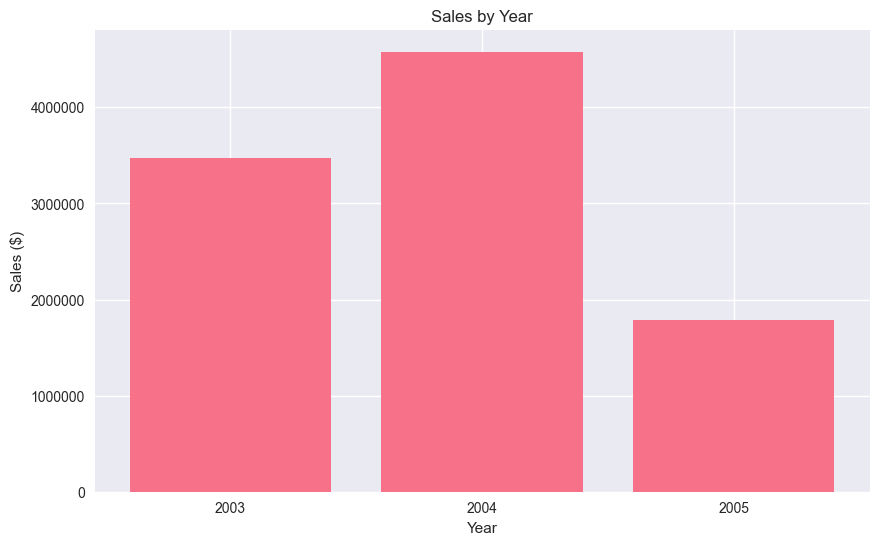

Yearly Sales:
   YEAR_ID       SALES
0     2003  3468268.62
1     2004  4578386.04
2     2005  1791486.71


In [15]:
# Sales by year
yearly_sales = df_active.groupby('YEAR_ID')['SALES'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['YEAR_ID'], yearly_sales['SALES'])
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.xticks(yearly_sales['YEAR_ID'])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

print("Yearly Sales:")
print(yearly_sales)

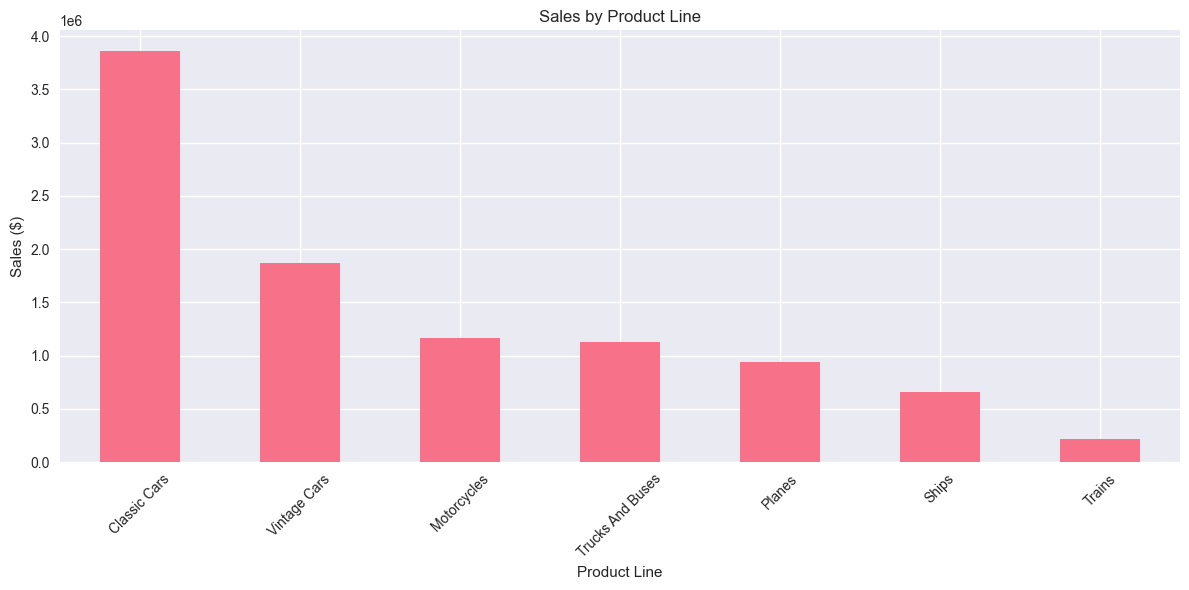

Sales by Product Line:
PRODUCTLINE
Classic Cars        3860372.85
Vintage Cars        1865086.95
Motorcycles         1166388.34
Trucks And Buses    1127789.84
Planes               939570.86
Ships                657771.48
Trains               221161.05
Name: SALES, dtype: float64


In [16]:
# Sales by product line
if 'PRODUCTLINE' in df_active.columns:
    product_sales = df_active.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    product_sales.plot(kind='bar')
    plt.title('Sales by Product Line')
    plt.xlabel('Product Line')
    plt.ylabel('Sales ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("Sales by Product Line:")
    print(product_sales)

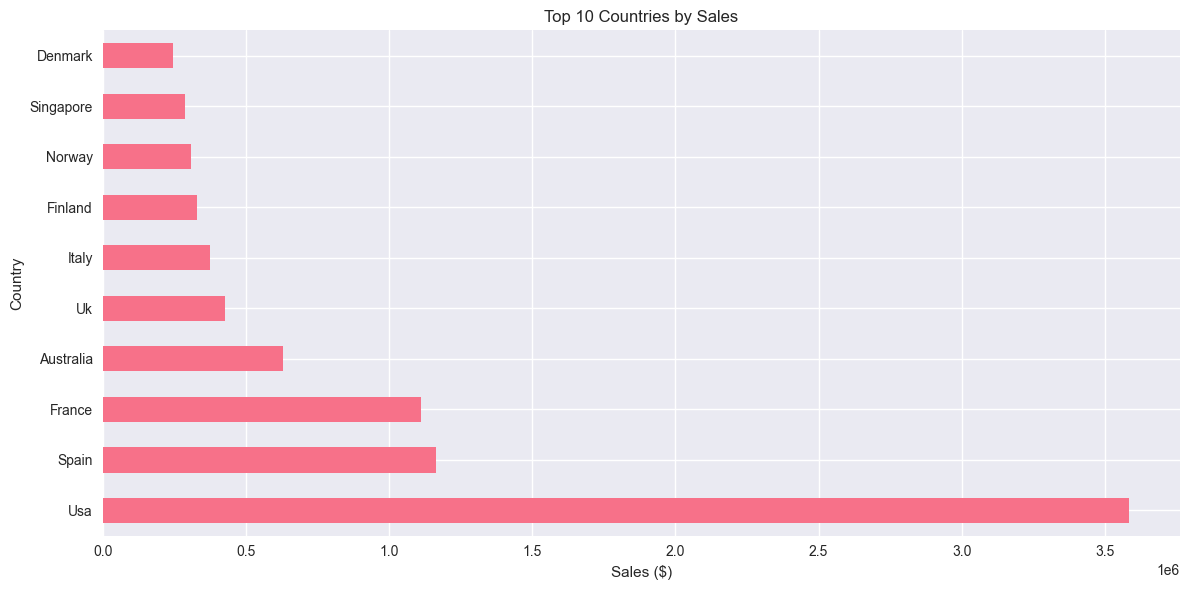

Top 10 Countries by Sales:
COUNTRY
Usa          3582625.17
Spain        1165676.27
France       1110916.52
Australia     630623.10
Uk            428472.21
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64


In [17]:
# Sales by country
if 'COUNTRY' in df_active.columns:
    country_sales = df_active.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    country_sales.plot(kind='barh')
    plt.title('Top 10 Countries by Sales')
    plt.xlabel('Sales ($)')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Countries by Sales:")
    print(country_sales)

## 4. Time Series Analysis

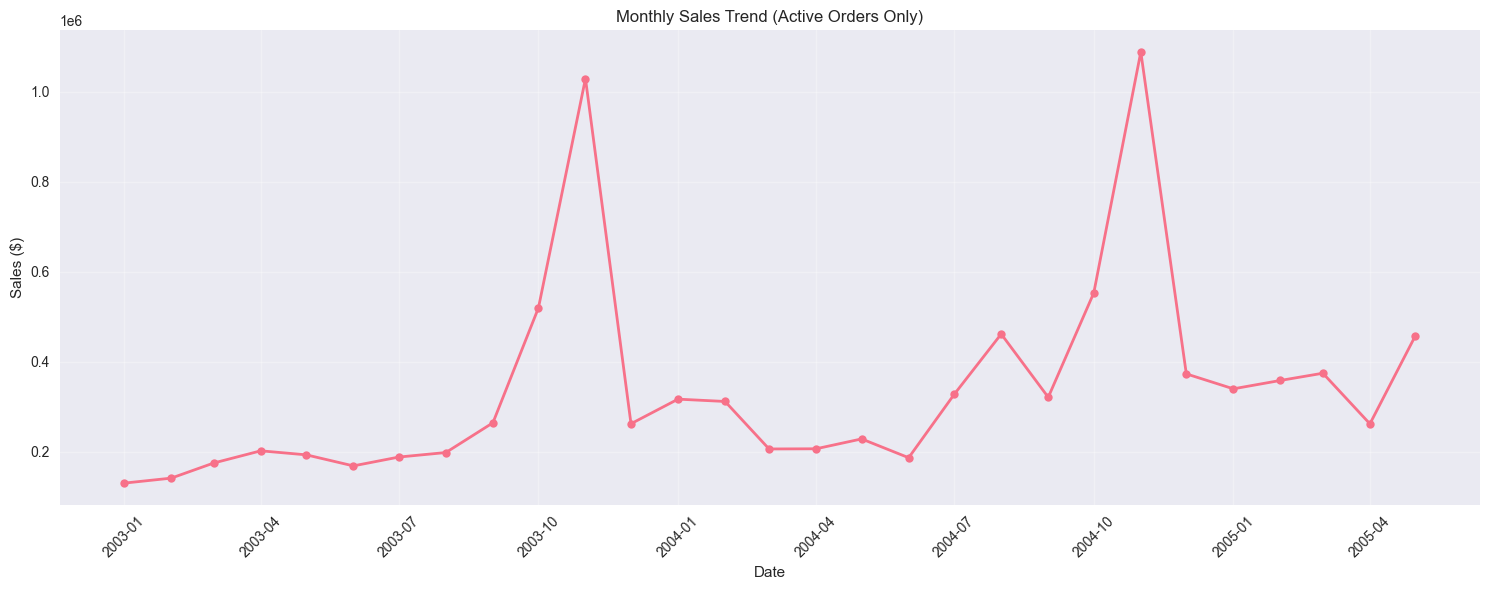

In [21]:
# Monthly sales trend
# Monthly sales trend (active orders only)
monthly_sales = df_active.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()

# Create proper date column for plotting
monthly_sales['day'] = 1
monthly_sales['date'] = pd.to_datetime(monthly_sales[['YEAR_ID', 'MONTH_ID', 'day']].rename(columns={'YEAR_ID': 'year', 'MONTH_ID': 'month'}))

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['date'], monthly_sales['SALES'], marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trend (Active Orders Only)')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

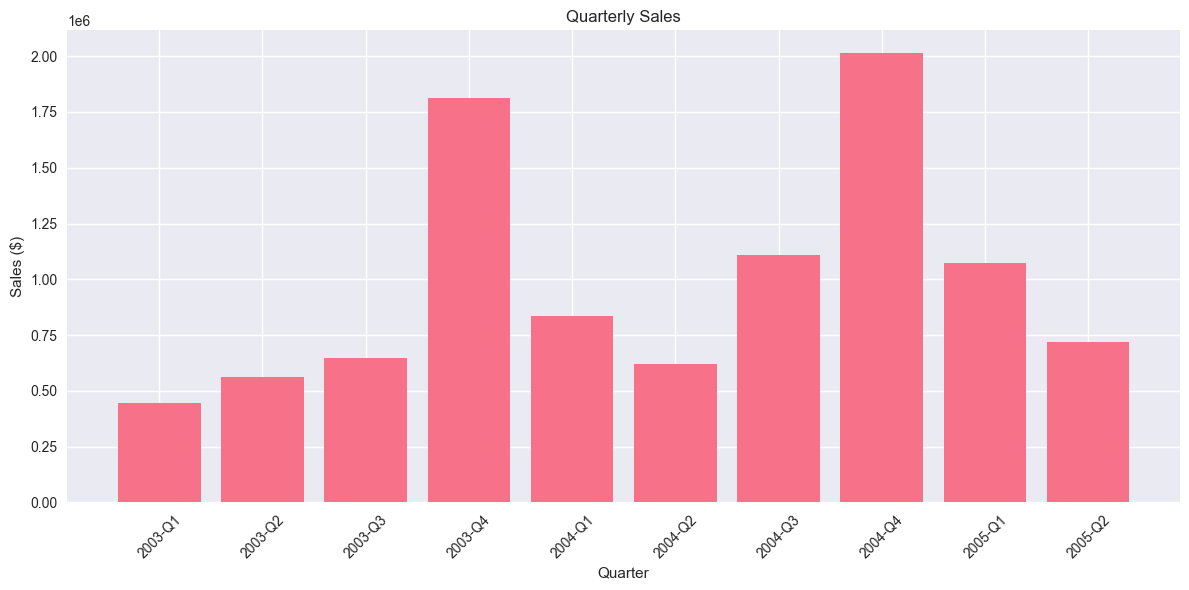

Quarterly Sales:
   quarter       SALES
0  2003-Q1   445094.69
1  2003-Q2   562365.22
2  2003-Q3   649514.54
3  2003-Q4  1811294.17
4  2004-Q1   833730.68
5  2004-Q2   620484.17
6  2004-Q3  1109396.27
7  2004-Q4  2014774.92
8  2005-Q1  1071992.36
9  2005-Q2   719494.35


In [19]:
# Quarterly analysis
quarterly_sales = df_active.groupby(['YEAR_ID', 'QTR_ID'])['SALES'].sum().reset_index()
quarterly_sales['quarter'] = quarterly_sales['YEAR_ID'].astype(str) + '-Q' + quarterly_sales['QTR_ID'].astype(str)

plt.figure(figsize=(12, 6))
plt.bar(quarterly_sales['quarter'], quarterly_sales['SALES'])
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Quarterly Sales:")
print(quarterly_sales[['quarter', 'SALES']])

## 5. Order Status Analysis

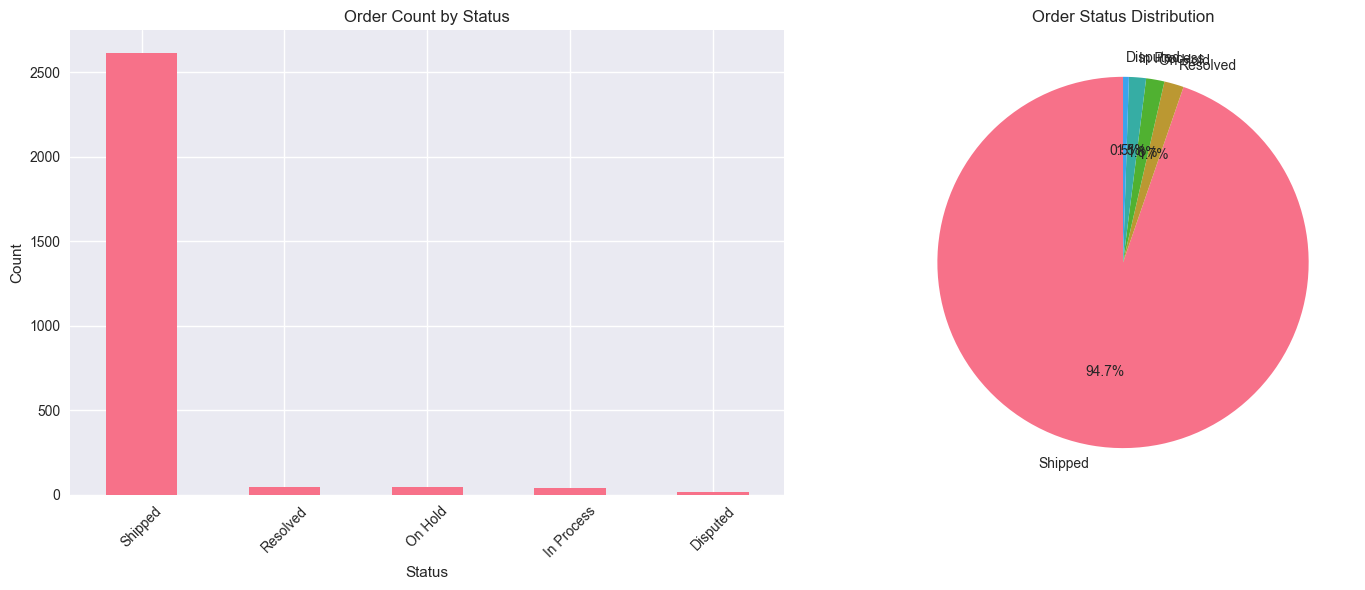

Order Status Summary:
            Count  Percentage
STATUS                       
Shipped      2617       94.72
Resolved       47        1.70
On Hold        44        1.59
In Process     41        1.48
Disputed       14        0.51


In [22]:
# Order status distribution
status_counts = df_active['STATUS'].value_counts()
status_percentages = df_active['STATUS'].value_counts(normalize=True) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
status_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Order Count by Status')
ax1.set_xlabel('Status')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Order Status Distribution')

plt.tight_layout()
plt.show()

print("Order Status Summary:")
status_summary = pd.DataFrame({
    'Count': status_counts,
    'Percentage': status_percentages.round(2)
})
print(status_summary)

## 6. Price and Quantity Analysis

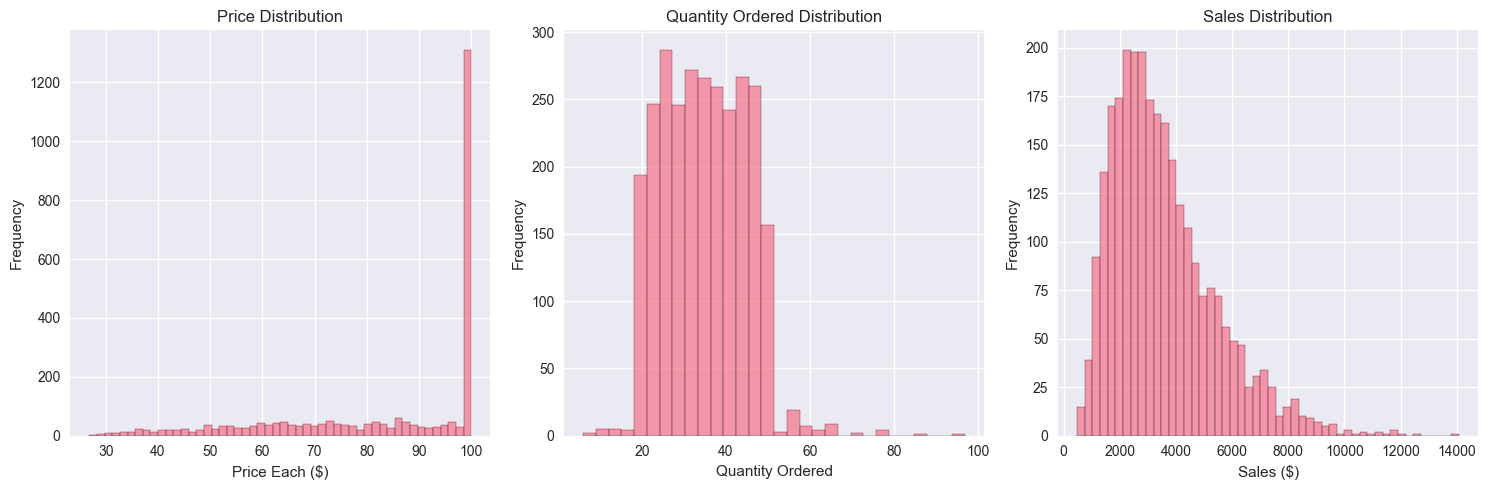

In [23]:
# Price distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_active['PRICEEACH'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price Each ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df_active['QUANTITYORDERED'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Quantity Ordered Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df_active['SALES'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

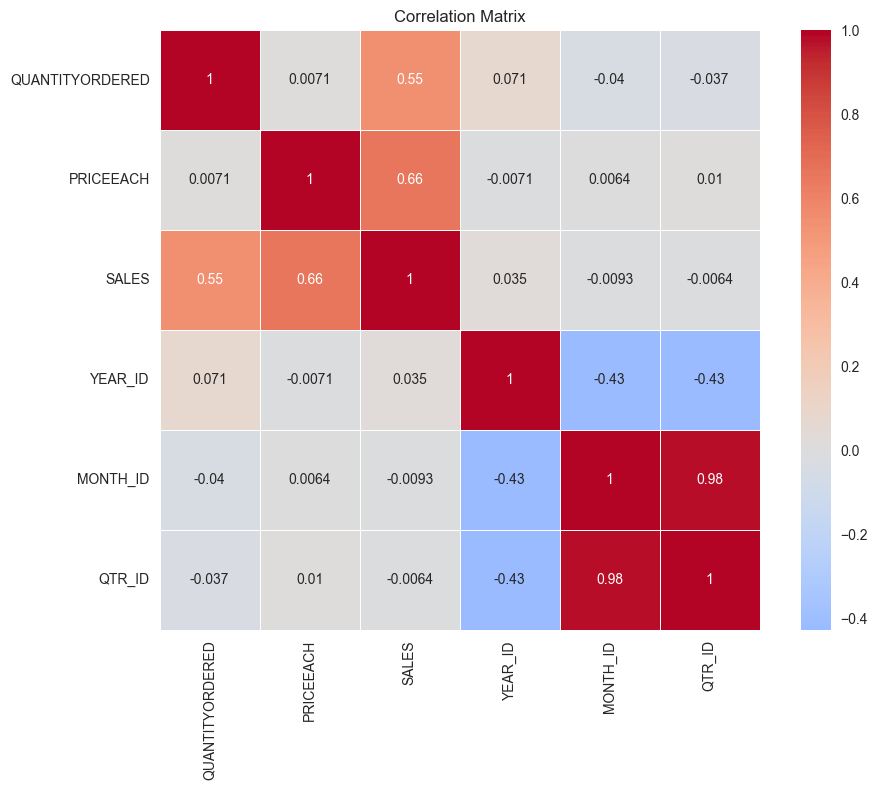

Correlation Matrix:
                 QUANTITYORDERED  PRICEEACH  SALES  YEAR_ID  MONTH_ID  QTR_ID
QUANTITYORDERED            1.000      0.007  0.551    0.071    -0.040  -0.037
PRICEEACH                  0.007      1.000  0.658   -0.007     0.006   0.010
SALES                      0.551      0.658  1.000    0.035    -0.009  -0.006
YEAR_ID                    0.071     -0.007  0.035    1.000    -0.427  -0.428
MONTH_ID                  -0.040      0.006 -0.009   -0.427     1.000   0.980
QTR_ID                    -0.037      0.010 -0.006   -0.428     0.980   1.000


In [24]:
# Correlation matrix for numerical columns
numerical_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'YEAR_ID', 'MONTH_ID', 'QTR_ID']
correlation_matrix = df_active[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

## 8. Key Insights and Recommendations

In [26]:
# Generate key insights
insights = []

# Top performing product line
if 'PRODUCTLINE' in df_active.columns:
    top_product = df_active.groupby('PRODUCTLINE')['SALES'].sum().idxmax()
    top_product_sales = df_active.groupby('PRODUCTLINE')['SALES'].sum().max()
    insights.append(f"Top performing product line: {top_product} (${top_product_sales:,.2f})")

# Top performing country
if 'COUNTRY' in df_active.columns:
    top_country = df_active.groupby('COUNTRY')['SALES'].sum().idxmax()
    top_country_sales = df_active.groupby('COUNTRY')['SALES'].sum().max()
    insights.append(f"Top performing country: {top_country} (${top_country_sales:,.2f})")

# Best performing year
best_year = df_active.groupby('YEAR_ID')['SALES'].sum().idxmax()
best_year_sales = df_active.groupby('YEAR_ID')['SALES'].sum().max()
insights.append(f"Best performing year: {best_year} (${best_year_sales:,.2f})")

# Average order processing time (if we had date fields)
cancelled_orders = df_active[df_active['STATUS'] == 'Cancelled'].shape[0]
total_orders_count = df_active.shape[0]
cancellation_rate = (cancelled_orders / total_orders_count) * 100
insights.append(f"Order cancellation rate: {cancellation_rate:.2f}%")

print("KEY INSIGHTS:")
print("=" * 50)
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print("\nRECOMMENDATIONS:")
print("=" * 50)
print("1. Focus marketing efforts on top-performing product lines and countries")
print("2. Investigate reasons for order cancellations to reduce cancellation rate")
print("3. Analyze seasonal trends to optimize inventory and marketing campaigns")
print("4. Develop strategies to increase average order value")
print("5. Expand presence in underperforming but potential markets")

KEY INSIGHTS:
1. Top performing product line: Classic Cars ($3,860,372.85)
2. Top performing country: Usa ($3,582,625.17)
3. Best performing year: 2004 ($4,578,386.04)
4. Order cancellation rate: 0.00%

RECOMMENDATIONS:
1. Focus marketing efforts on top-performing product lines and countries
2. Investigate reasons for order cancellations to reduce cancellation rate
3. Analyze seasonal trends to optimize inventory and marketing campaigns
4. Develop strategies to increase average order value
5. Expand presence in underperforming but potential markets


## 9. Data Export for Dashboard

In [27]:
# Export summary data for dashboard
summary_data = {
    'total_sales': total_sales,
    'total_orders': total_orders,
    'avg_order_value': avg_order_value,
    'date_range': f"{df_active['ORDERDATE'].min()} to {df_active['ORDERDATE'].max()}",
    'top_year': best_year,
    'cancellation_rate': cancellation_rate
}

print("Summary data for dashboard:")
for key, value in summary_data.items():
    print(f"{key}: {value}")

# Save processed data
df.to_csv('../data/processed/sales_data_analyzed.csv', index=False)
print("\nAnalyzed data saved to ../data/processed/sales_data_analyzed.csv")

Summary data for dashboard:
total_sales: 9838141.370000001
total_orders: 303
avg_order_value: 32469.113432343238
date_range: 2003-01-06 00:00:00 to 2005-05-31 00:00:00
top_year: 2004
cancellation_rate: 0.0

Analyzed data saved to ../data/processed/sales_data_analyzed.csv
